### Example

In [2]:
import pandas as pd

data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df = pd.DataFrame(data)


In [3]:
df.sample(10)

,job_skills,skill_count,skill_pay
5,javascript,5,50
0,python,30,100
3,c++,15,70
6,html,4,40
8,php,2,20
1,sql,25,90
9,ruby,1,10
2,java,20,80
4,c#,10,60
7,css,3,30


<Axes: xlabel='skill_count', ylabel='skill_pay'>

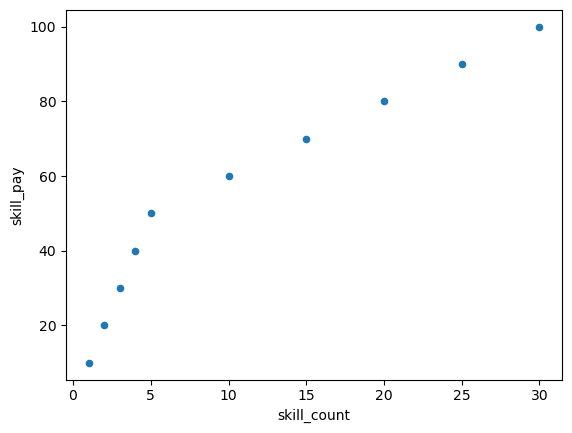

In [4]:
df.plot(kind='scatter', x='skill_count', y='skill_pay')

In [5]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills').copy()   

In [20]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),       # skill_count is the new column name
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values('skill_count', ascending = False).head(10)

skill_stats

# alt way: df_exploded.groupby('job_skills')['salary_year_avg'].agg(['median','size']).sort_values('size', ascending = False)

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


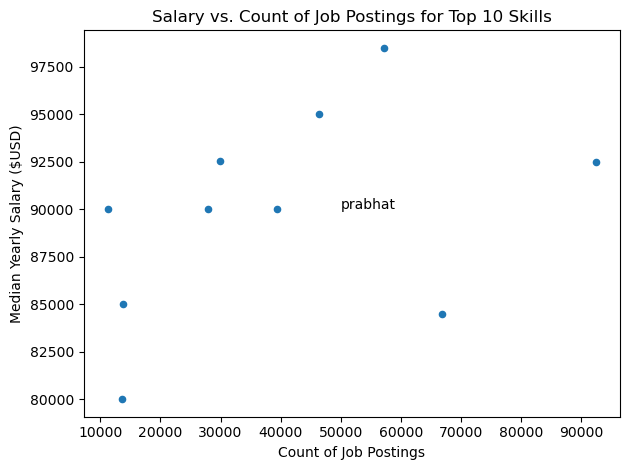

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.text(50000,90000, 'prabhat')    # adding text at 50000,90000 position in the plot

plt.show()


In [ ]:
# we need to find coordinates for each text value that we need in the plot

for i, txt in enumerate(skill_stats.index):
    print(i,txt)

0 sql
1 excel
2 python
3 tableau
4 power bi
5 r
6 sas
7 powerpoint
8 word
9 sap


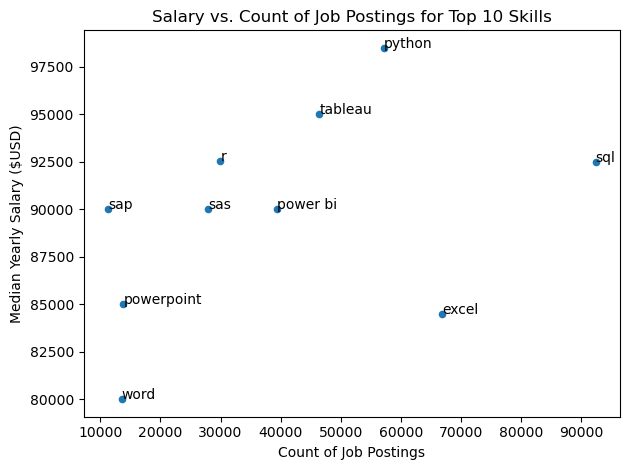

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)


plt.show()


In [34]:
skill_stats.iloc[1].skill_count

np.float64(66860.0)